# Hurricanes 
(based on work by Yonathan Vardi 2019-07-09)

### <font color=red> Please use the template below to answer the _complete workshop questions from the course notes_.</font>

## Your name: Frank D'Agostino

In [2]:
# load libraries and get data:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from IPython import get_ipython

# load data from pickle file:
# ---------------------------
with open('./hurricanes_variables.pickle', 'rb') as file:
        d = pickle.load(file)
        # print information about each extracted variable:
        for key in list(d.keys()):
            print("extracting pickled variable: name=", key, "; size=", d[key].shape)
            #print(" type=",type(d[key]))
        globals().update(d)

extracting pickled variable: name= PDI ; size= (168,)
extracting pickled variable: name= PDI_years ; size= (168,)
extracting pickled variable: name= SST ; size= (168,)
extracting pickled variable: name= SST_years ; size= (168,)
extracting pickled variable: name= SST_RCP85 ; size= (90,)
extracting pickled variable: name= SST_RCP85_years ; size= (90,)


## 1&2) Plot time series of the PDI and MDR SST, original and smooth

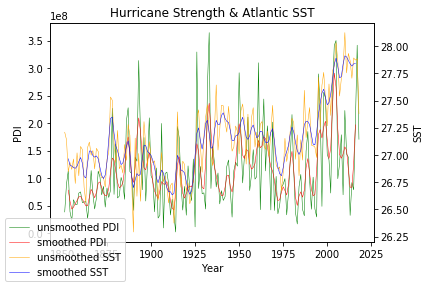

In [3]:
        
def smooth_time_series(data):
    """Apply one pass of 1-2-1 filter to input data.
    Inputs: data - a time series
    Output: smoothed data, two less in length then input, as first and last cannot be calculated
    """
    # one pass of smoothing:
    data_smooth = np.zeros(len(data))
    for j in range(1, len(data)-1):
        data_smooth[j]=.25*data[j-1] + 0.5*data[j] + 0.25*data[j+1]
    # return smoohted data without first and last values:
    return data_smooth[1:len(data)-1]


# calculate smoothed time series (2 passes) using above function:
# ----------------------------------------------------------------
# e.g., for the sst this is done using:
# first pass:
SST_smooth=smooth_time_series(SST)
SST_smooth_years=SST_years[1:len(SST_years)-1]
# second pass:
SST_smooth=smooth_time_series(SST_smooth)
SST_smooth_years=SST_smooth_years[1:len(SST_smooth_years)-1]
# for the PDI:
PDI_smooth=smooth_time_series(PDI)
PDI_smooth_years=PDI_years[1:len(PDI_years)-1]
# another smoothing of the PDI here
PDI_smooth=smooth_time_series(PDI_smooth)
PDI_smooth_years=PDI_smooth_years[1:len(PDI_smooth_years)-1]

# plot the two time series on same time axis, using two vertical axes:
# --------------------------------------------------------------------
fig, axis_PDI = plt.subplots()
# add another y-axis for plotting PDI and SST on the same graph:
axis_SST = axis_PDI.twinx()
axis_PDI.set_ylabel("PDI")
axis_SST.set_ylabel("SST")
axis_PDI.set_xlabel("Year")
axis_PDI.set_title("Hurricane Strength & Atlantic SST")

# plot the PDI on one y axis and the SST on another
axis_SST.plot(SST_years, SST, color="orange", linewidth=0.5,label="unsmoothed SST")

axis_PDI.plot(PDI_years, PDI, color="green", linewidth=0.5,label="unsmoothed PDI")

# plot smooth PDI here
axis_PDI.plot(PDI_smooth_years, PDI_smooth, color="red", linewidth=0.5,label="smoothed PDI")

# plot smooth sst here
axis_SST.plot(SST_smooth_years, SST_smooth, color="blue", linewidth=0.5,label="smoothed SST")

# show legend and display figure:
fig.legend(loc="lower left")
plt.tight_layout()
plt.show()

## Smoothing details
given $\overline{T}_i=0.25T_{i-1}+0.5T_{i}+0.25T_{i+1}$, we have
$$\overline{\overline{T}}_i
=0.0625T_{i-2}+0.125T_{i-1}+0.0625T_{i}+0.125T_{i-1}+0.25T_{i}+0.125T_{i+1}+0.0625T_{i}+0.125T_{i+1}+0.0625T_{i+2}$$

$$\overline{\overline{T}}_i=0.0625T_{i-2}+0.25T_{i-1}+0.375T_{i}+0.25T_{i+1}+0.0625T_{i+2}$$
so that two passes are equivalent to a 5-point running average.

The average now covers the years 1950 to 2005.

## 3) Calculate PDI/ MDR SST correlations:

In [4]:
# method 1: using a built-in numpy function
# call the function for unsmoothed values
builtin_r2 = np.corrcoef(PDI, SST)[0, 1]**2
print("built-in r² (unsmoothed):", builtin_r2)
# call the function for smoothed values
builtin_r2 = np.corrcoef(PDI_smooth, SST_smooth)[0, 1]**2
print("built-in r² (smoothed):  ", builtin_r2)


# calculate "short" time series, with only for the years 1950-2005:
PDI_smooth_short=PDI_smooth[np.logical_and(SST_smooth_years>1950,SST_smooth_years<2005)]
PDI_smooth_short_years=PDI_smooth_short[1:len(PDI_smooth_short)-1]
# print years selected as a check:
print("PDI_smooth_short_years=",PDI_smooth_short_years)
SST_smooth_short=SST_smooth[np.logical_and(SST_smooth_years>1950,SST_smooth_years<2005)]
builtin_r2_short = np.corrcoef(PDI_smooth_short, SST_smooth_short)[0, 1]**2
print("built-in r² (smoothed, 1950-2005 only):  ", builtin_r2_short)


# method2: an explicit calculation of correlation
def my_calc_correlation(X,Y):
    # remove mean from X:
    X=X-np.mean(X)
    # remove mean from Y:
    Y=Y-np.mean(Y)
    C_XY= np.sum(X*Y) / (np.sqrt(np.sum(X**2))*np.sqrt(np.sum(Y**2))) # calculate using np.sum and np.sqrt
    return C_XY

# method 2: using my function
# call the function for unsmoothed values
my_r2 = my_calc_correlation(PDI, SST)
print("my r² (unsmoothed):", my_r2**2)
# call the function for smoothed values
my_r2 = my_calc_correlation(PDI_smooth, SST_smooth)
print("my r² (smoothed):  ", my_r2**2)


built-in r² (unsmoothed): 0.18466348576595917
built-in r² (smoothed):   0.31254953994292106
PDI_smooth_short_years= [1.41469333e+08 1.35551572e+08 1.52128075e+08 1.49767300e+08
 1.26707524e+08 1.16339003e+08 1.19170495e+08 1.26340544e+08
 1.52573098e+08 1.68613127e+08 1.55217511e+08 1.58293481e+08
 1.74716944e+08 1.71866045e+08 1.58217711e+08 1.37385136e+08
 1.19907443e+08 1.12593509e+08 9.64021548e+07 7.34307571e+07
 5.92582008e+07 6.03767961e+07 7.42531423e+07 8.39624854e+07
 7.72982879e+07 6.91501943e+07 8.82287252e+07 1.30619345e+08
 1.48605188e+08 1.14310764e+08 6.46744798e+07 5.01767699e+07
 6.74370477e+07 7.48503487e+07 6.52516025e+07 7.80444456e+07
 1.18714766e+08 1.35392991e+08 1.08892867e+08 8.00845249e+07
 6.78286489e+07 7.00485757e+07 1.15027673e+08 1.78944144e+08
 1.88248813e+08 1.72926063e+08 1.92891069e+08 2.03448621e+08
 1.69142791e+08 1.35557478e+08 1.55548189e+08 2.30719393e+08]
built-in r² (smoothed, 1950-2005 only):   0.6331496239665936
my r² (unsmoothed): 0.1846634

## 4) Calculate saturation specific humidity from sea surface temperature time series:

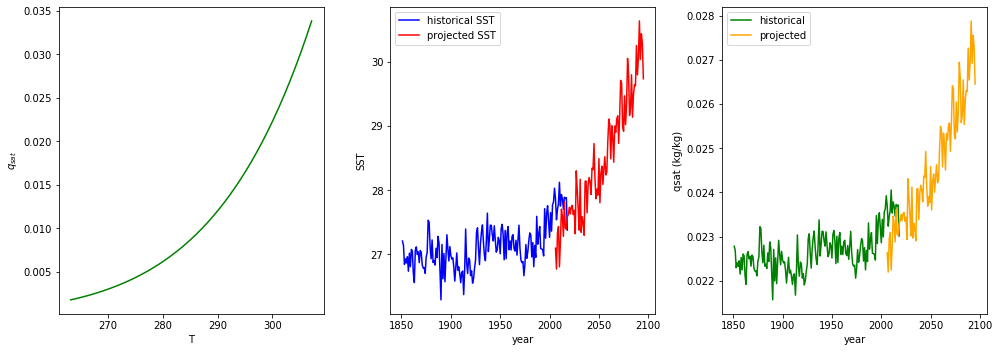

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def q_sat(T,P):
    # saturation specific humidity (gr water vapor per gram moist air):
    # inputs:
    # T: temperature, in Kelvin
    # P: pressure, in mb

    R_v = 461 # Gas constant for moist air = 461 J/(kg*K)
    R_d = 287 # Gas constant 287 J K^-1 kg^-1
    TT = T-273.15 # Kelvin to Celsius
    # Saturation water vapor pressure (mb) from Emanuel 4.4.14 p 116-117: 
    ew = 6.112*np.exp((17.67 * TT) / (TT + 243.5))
    # saturation mixing ratio (gr water vapor per gram dry air):
    rw = (R_d / R_v) * ew / (P - ew)
    # saturation specific humidity (gr water vapor per gram moist air):
    qw = rw / (1 + rw)
    return qw


# calculate for plotting saturation moisture as function of temperature:
T_plot=np.arange(-10.0,35.0,1.0)+273.15
q_plot=T_plot*0.0
for i in range(0,len(T_plot)):
    q_plot[i]=q_sat(T_plot[i],1000)


# calculate and plot saturation moisture for observed and projected MDR SST:
qsat=SST*0
for i in range(0,len(SST)):
    qsat[i]=q_sat(SST[i]+273.15,1000)

qsat_RCP85=SST_RCP85*0
for i in range(0,len(SST_RCP85)):
    qsat_RCP85[i]=q_sat(SST_RCP85[i], 1000)

plt.figure(1,figsize=(14,5))
plt.subplot(1,3,1)
plt.plot(T_plot,q_plot,color="green")
plt.ylabel("$q_{sat}$")
plt.xlabel("T")

plt.subplot(1,3,2)
plt.plot(SST_years,SST,color="blue",label="historical SST")
# plot also RCP case
plt.plot(SST_RCP85_years,SST_RCP85-273.15,color="red",label="projected SST")

plt.ylabel("SST")
plt.xlabel("year")
plt.legend()

plt.subplot(1,3,3)
plt.plot(SST_years,qsat,color="green",label="historical")
# plot also RCP case
# plt.subplot(1,3,3)
plt.plot(SST_RCP85_years,qsat_RCP85,color="orange",label="projected")

plt.ylabel("qsat (kg/kg)")
plt.xlabel("year")
plt.legend()

plt.tight_layout()
plt.show()

## 5) calculate Potential Intensity (PI) for observed atlantic MDR SST hurricane season record:

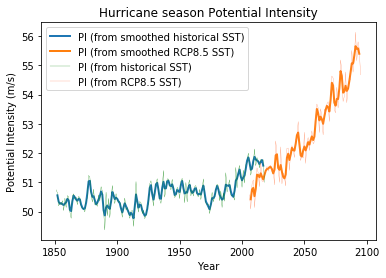

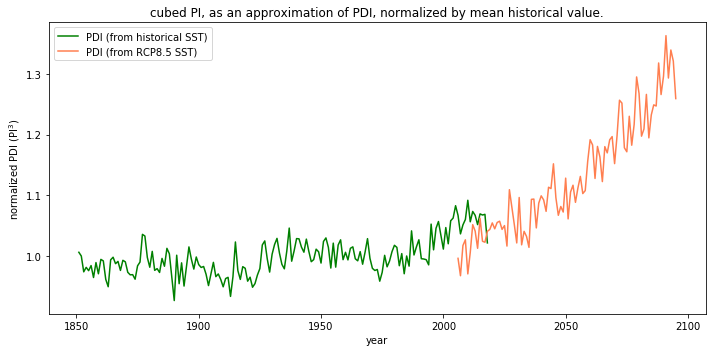

The PDI is expected to increase about 30%.


In [8]:
def calc_potential_intensity_wind_speed_from_SST(sst):
    """Calculate the potential intensity given a sea surface temperature.
    Input: sst- Sea surface temperature, in degrees Celsius
    Output: Return a velocity in m/s
    """
    sst = sst + 273.15 # convert to Kelvin
    epsilon = (1/3)    # efficiency of Hurricane as a carnot engine
    L = 2260*1000      # latent heat of vaporization of water
    PI=sst*0           # initialize array of potential intensity
    for i in range(0,len(sst)):
        q = q_sat(sst[i], 1000) # assumes that pressure is always 1000mb (sea level)
        PI[i] = np.sqrt(epsilon*L*0.15*q)
    return PI


# calculate Potential Intensity (PI) for observed atlantic MDR SST hurricane season record:
PI_SST_MDR_hurricane_season = calc_potential_intensity_wind_speed_from_SST(SST)
PI_SST_MDR_hurricane_season_years=SST_years
PI_SST_MDR_hurricane_season_smooth=smooth_time_series(PI_SST_MDR_hurricane_season)
PI_SST_MDR_hurricane_season_smooth_years=SST_years[1:len(SST_years)-1]

# calculate PI for RCP8.5 atlantic MDR SST hurricane season record:
PI_rcp_SST_MDR_hurricane_season = calc_potential_intensity_wind_speed_from_SST(SST_RCP85-273.15)
PI_rcp_SST_MDR_hurricane_season_years=SST_RCP85_years
PI_rcp_SST_MDR_hurricane_season_smooth=smooth_time_series(PI_rcp_SST_MDR_hurricane_season)
PI_rcp_SST_MDR_hurricane_season_smooth_years=SST_RCP85_years[1:len(SST_RCP85_years)-1]

# plot smoothed Huricane season PI and SST:
# ------------------------------------------
fig1, ax1 = plt.subplots()
plt.ylabel("Potential Intensity (m/s)")
plt.xlabel("Year")
plt.title("Hurricane season Potential Intensity")
plt.plot(PI_SST_MDR_hurricane_season_smooth_years,PI_SST_MDR_hurricane_season_smooth
         ,label="PI (from smoothed historical SST)",lw=2)
plt.plot(PI_rcp_SST_MDR_hurricane_season_smooth_years,PI_rcp_SST_MDR_hurricane_season_smooth
         ,label="PI (from smoothed RCP8.5 SST)",lw=2)

# plot un-smoothed MDR potential intensity:
# -----------------------------------------
plt.plot(PI_SST_MDR_hurricane_season_years,PI_SST_MDR_hurricane_season, "g-"
         ,label="PI (from historical SST)",lw=0.25)
plt.plot(PI_rcp_SST_MDR_hurricane_season_years,PI_rcp_SST_MDR_hurricane_season
         ,color="coral", label="PI (from RCP8.5 SST)",lw=0.25)
plt.legend()
plt.show()


# calculate and plot cubed PI, approximating the PDI:
# ---------------------------------------------------
# normalize by mean of PDI calculated from historical SST:
PDI= PI_SST_MDR_hurricane_season**3
mean_PDI=np.mean(PDI)
PDI_normalized=PDI/mean_PDI
PDI_RCP85= PI_rcp_SST_MDR_hurricane_season**3
PDI_RCP85_normalized=PDI_RCP85/mean_PDI
plt.figure(figsize=(10,5))
plt.plot(SST_years,PDI_normalized
         ,"g-",label="PDI (from historical SST)")
plt.plot(SST_RCP85_years,PDI_RCP85_normalized
         ,color="coral", label="PDI (from RCP8.5 SST)")
plt.ylabel("normalized PDI (PI$^3$)")
plt.xlabel("year")
plt.title("cubed PI, as an approximation of PDI, normalized by mean historical value.")
plt.legend()
plt.tight_layout()
plt.show()

print("The PDI is expected to increase about 30%.")